In [1]:
# for wav files in each folder, generate the proper spectrogram figures

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:

def gen_spectrogram(target_folder, output_folder):
    # hardcoded songs per folder for now
    genres = os.listdir(target_folder)
    # try to make the folder if it doesn't exist
    print("Generating Mel Spectrograms for each song in each Genre")
    print("This may take a while...")
    for genre in genres:
        print("Generating mel-spectrograms for {}".format(genre))
        try: 
            os.makedirs("{}/{}".format(output_folder, genre)) 
        except OSError as error: 
            print(error)  
        songs = os.listdir("{}/{}".format(target_folder,genre))
        for j in range(len(songs)):
            print("Song {} out of {} ".format(j+1, len(songs)), end='\r')
            # NOTE: file paths are relative!
            # https://www.kite.com/python/answers/how-to-add-leading-zeros-to-a-number-in-python
            file = "{}.{}.wav".format(genre, str(j).zfill(5))
            
            if not os.path.exists("./{}/{}/{}.png".format(output_folder,genre,j)):
                try:
                    path = "{}/{}/{}".format(target_folder, genre, file)
                    y, sr = librosa.load(path)
                    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
                    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
                    librosa.display.specshow(mel_spect, fmax=8000)
                    plt.savefig("./{}/{}/{}.png".format(output_folder,genre,j), bbox_inches="tight")
                except Exception as exp:
                    print(exp)

Generating Mel Spectrograms for each song in each Genre
This may take a while...
Generating mel-spectrograms for blues
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/blues'
Generating mel-spectrograms for classical
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/classical'
Generating mel-spectrograms for country
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/country'
Generating mel-spectrograms for disco
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/disco'
Generating mel-spectrograms for hiphop
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/hiphop'
Generating mel-spectrograms for jazz
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/jazz'
Song 55 out of 100 
Generating mel-spectrograms for metal
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/metal'
Song 71 out of 100 

C:\Users\Jake\anaconda3_rein\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Generating mel-spectrograms for pop
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/pop'
Generating mel-spectrograms for reggae
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/reggae'
Generating mel-spectrograms for rock
[WinError 183] Cannot create a file when that file already exists: 'mel-grams/rock'


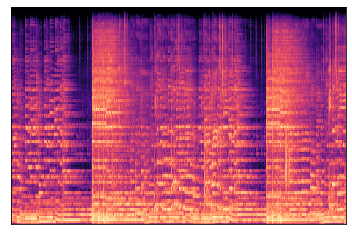

In [3]:
gen_spectrogram("test-genres","mel-grams")